# Module 4 -- Feature Engineering

## Objectives
It is important in any data science project to define the objective as specific as possible. Below let's write it from general to specific. This will direct your analysis.
* Detect any hospital that may abuse the resources.
* Detect any hospital that may abuse the resources compared to its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.

## FE:
* We will focus on the "Average Medicare Payments", which is the "Medicare Payment Amount / Total Discharges" to create features.


## Table of Contents
* [Section 1: data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by state(#Sect](#Section_22)    
    * [Section 2.3: Count of top cities](#Section_23)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: Create the benchmark table - State & DRG average](#Section_31)
    * [Section 3.2: Create features](#Section_32)    

In [27]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_format = '{:.2f}'.format

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
path = ''
data = pd.read_csv(path + '/inpatientCharges.csv')

In [29]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [30]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [31]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [32]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [33]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>
### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [35]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

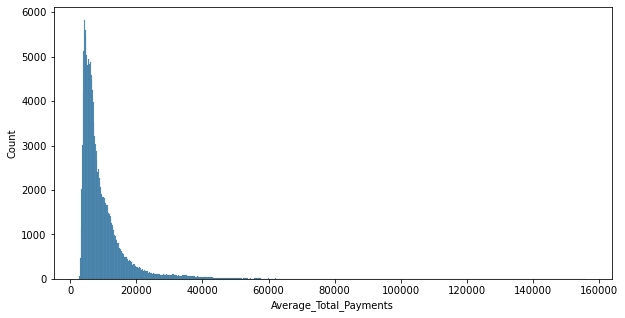

In [36]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

* One plot is enough. The following plot can be omitted.

<AxesSubplot:xlabel='Average_Total_Payments'>

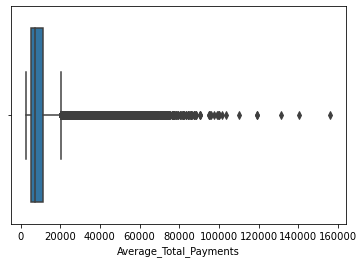

In [37]:
sns.boxplot(x = 'Average_Total_Payments', data = data) 

* From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

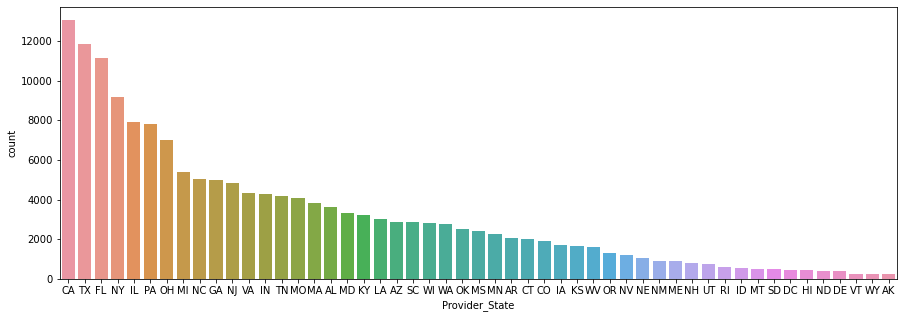

In [38]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

* From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [39]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                          633
ST JOSEPH MEDICAL CENTER                         427
MERCY MEDICAL CENTER                             357
MERCY HOSPITAL                                   347
ST JOSEPH HOSPITAL                               343
                                                ... 
BRIGHTON HOSPITAL                                  1
WESTBURY COMMUNITY HOSPITAL, LLC                   1
CHRISTUS ST VINCENT PHYSICIANS MEDICAL CENTER      1
WESTERN PENNSYLVANIA HOSPITAL                      1
TURNING POINT HOSPITAL                             1
Name: Provider_Name, Length: 3201, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CHICAGO'),
  Text(1, 0, 'BALTIMORE'),
  Text(2, 0, 'HOUSTON'),
  Text(3, 0, 'PHILADELPHIA'),
  Text(4, 0, 'BROOKLYN'),
  Text(5, 0, 'SPRINGFIELD'),
  Text(6, 0, 'COLUMBUS'),
  Text(7, 0, 'LOS ANGELES'),
  Text(8, 0, 'NEW YORK'),
  Text(9, 0, 'DALLAS'),
  Text(10, 0, 'LAS VEGAS'),
  Text(11, 0, 'JACKSON'),
  Text(12, 0, 'JACKSONVILLE'),
  Text(13, 0, 'COLUMBIA'),
  Text(14, 0, 'WASHINGTON'),
  Text(15, 0, 'CINCINNATI'),
  Text(16, 0, 'MIAMI'),
  Text(17, 0, 'CLEVELAND'),
  Text(18, 0, 'BOSTON'),
  Text(19, 0, 'INDIANAPOLIS')])

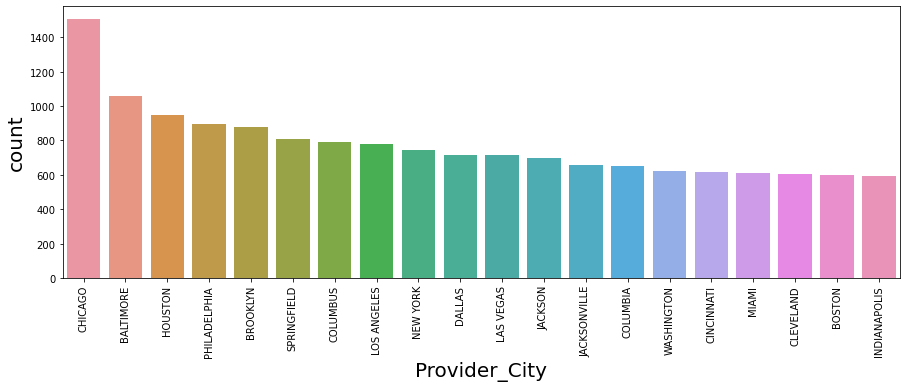

In [40]:
plt.figure(figsize=(15,5))
ch = sns.countplot(x='Provider_City',data=data,order=data['Provider_City'].value_counts()[:20].index)
plt.xticks(rotation = 90)
# junk = ch.set_xticklabels(ch.get_xticklabels()) # Use this line to collect the text prints
                          
#ax = plt.gca()
#plt.rcParams["axes.labelsize"] = 20


# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)

# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='blue', ha='center', va='bottom')
# plt.rcParams["axes.labelsize"] = 20

* The above text are from matplotlib. 
* We really do not want to print the text. 
* You can assign them to "_" to throw them away.

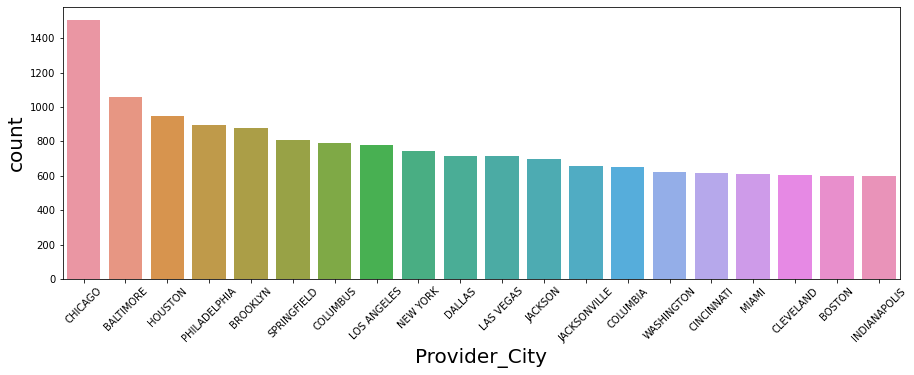

In [41]:
# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

#### Class discussion/Thought process:
- The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

In [49]:
data.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>


#### Discussions:
* Think of the objective: "Detect any hospital that may abuse the resources compared to the average of its peers of the same DRG and State."
* A feature should be able to "detect any hospital...". The above table does not have hospitals.
* The above table is the benchmark. Are they features?

### Section 3.1: Create the benchmark table - State & DRG average <a class="anchor" id="Section_31"></a>

In [44]:
benchmark = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


#### Discussions:
- There is no label to train a supervised model. What are the unsupervised techniques that you can think of?
- How do we validate an unsupervised model outcome?
- What will happen if you have a bad feature in an unsupervised model?